In [16]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [9]:
posenet_path = 'E:\\projects\\pg-toons\\posenet-python'

In [18]:
def extract_features(image):
    orb = cv2.ORB_create()
    kp = orb.detect(image)
    kp, des = orb.compute(image, kp)
    return kp, des

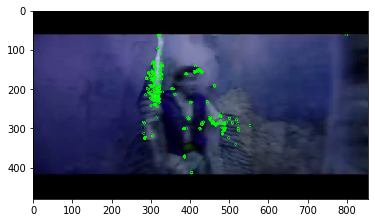

(<matplotlib.image.AxesImage at 0x203c538ee48>, None)

In [19]:
image = cv2.imread(os.path.join(posenet_path, '..\\', 'frame1.jpg'))
kp, des = extract_features(image)
image = cv2.drawKeypoints(image, kp, None, color=(0, 255, 0), flags=0)
plt.imshow(image), plt.show()

In [21]:
def extract_features_dataset(images):
    kp_list = []
    des_list = []
    
    for image in image:
        kp, des = extract_features(image)
        kp_list.append(kp)
        des_list.append(des)
    
    return kp_list, des_list